In [1]:
# Parameters
year = 2021
input_file = f"data/{year}_중도탈락 학생 현황 (대학).xlsx"

In [2]:
# Parameters
year = 2022
input_file = "data/2022_\uc911\ub3c4\ud0c8\ub77d \ud559\uc0dd \ud604\ud669 (\ub300\ud559).xlsx"


In [3]:
from IPython.display import Markdown, display
display(Markdown(r'''
## 📊 중도탈락 분석 리포트 - {year}년
이 보고서는 해당 연도 대학의 중도탈락 현황 데이터를 분석하여 자퇴율, 상관관계, 주요 탈락 사유를 시각화하고 인사이트를 도출합니다.
'''))


## 📊 중도탈락 분석 리포트 - {year}년
이 보고서는 해당 연도 대학의 중도탈락 현황 데이터를 분석하여 자퇴율, 상관관계, 주요 탈락 사유를 시각화하고 인사이트를 도출합니다.


In [4]:
display(Markdown(r'''
### 🧹 데이터 전처리 단계
- 열 이름 정리  
- 수치형 변환  
- 자퇴율 계산 추가
'''))



### 🧹 데이터 전처리 단계
- 열 이름 정리  
- 수치형 변환  
- 자퇴율 계산 추가


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import os

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_excel(input_file)

df.columns = [
    '기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '재적학생수_A',
    '중도탈락_계', '중도탈락_미등록', '중도탈락_미복학', '중도탈락_자퇴', '중도탈락_학사경고',
    '중도탈락_학생활동', '중도탈락_유급제적', '중도탈락_수업연한초과', '중도탈락_기타',
    '중도탈락비율(%)_기존생', '재적학생수_신입생_Ap',
    '중도탈락_계_신입생', '중도탈락_미등록_신입생', '중도탈락_미복학_신입생', '중도탈락_자퇴_신입생',
    '중도탈락_학사경고_신입생', '중도탈락_학생활동_신입생', '중도탈락_유급제적_신입생',
    '중도탈락_수업연한초과_신입생', '중도탈락_기타_신입생', '중도탈락비율(%)_신입생'
]

numeric_cols = [col for col in df.columns if '중도탈락' in col or '재적학생수' in col]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(how='all').reset_index(drop=True)
df['자퇴율'] = df['중도탈락_자퇴'] / df['재적학생수_A'] * 100


In [6]:
display(Markdown("### 🔍 자퇴율 상/하위 5개 대학"))


### 🔍 자퇴율 상/하위 5개 대학

In [7]:
top5 = df.sort_values('자퇴율', ascending=False).head(5)
bottom5 = df.sort_values('자퇴율', ascending=True).head(5)

display(Markdown("#### 자퇴율 상위 5개 대학"))
display(top5[['학교', '자퇴율']])

display(Markdown("#### 자퇴율 하위 5개 대학"))
display(bottom5[['학교', '자퇴율']])


#### 자퇴율 상위 5개 대학

,학교,자퇴율
134,순복음총회신학교,11.333333
86,루터대학교,9.923664
68,대구예술대학교,9.760956
170,인천가톨릭대학교,9.333333
141,아신대학교,8.900524


#### 자퇴율 하위 5개 대학

,학교,자퇴율
7,감리교신학대학교,0.000000
217,한국전통문화대학교,0.000000
113,서울디지털대학교,0.173693
30,경인교육대학교 _제2캠퍼스,0.306279
166,을지대학교,0.331126


In [8]:
display(Markdown("### 📈 중도탈락 관련 상관관계 분석"))

### 📈 중도탈락 관련 상관관계 분석

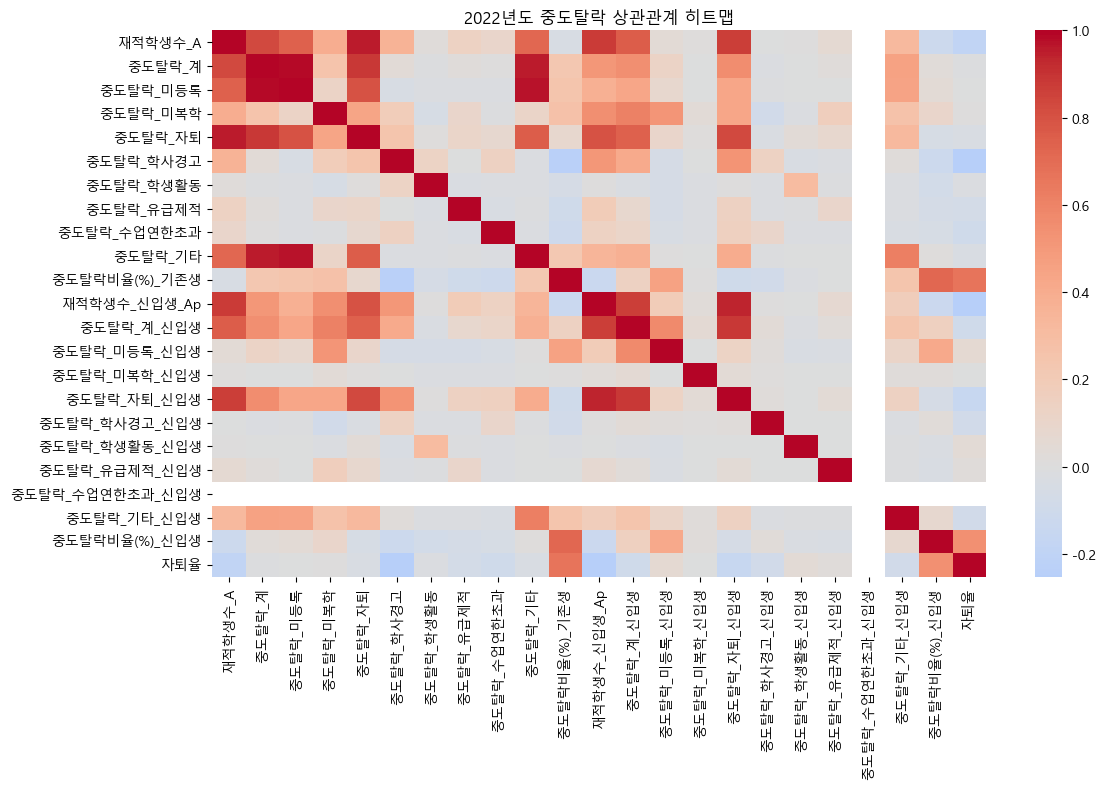

In [9]:
correlation_cols = [col for col in df.columns if '중도탈락' in col or '자퇴율' in col or '재적학생수' in col]
corr = df[correlation_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title(f'{year}년도 중도탈락 상관관계 히트맵')
plt.tight_layout()
plt.show()


In [10]:
display(Markdown("### 📊 중도탈락 사유 비율 분석 (재적학생 / 신입생)"))


### 📊 중도탈락 사유 비율 분석 (재적학생 / 신입생)

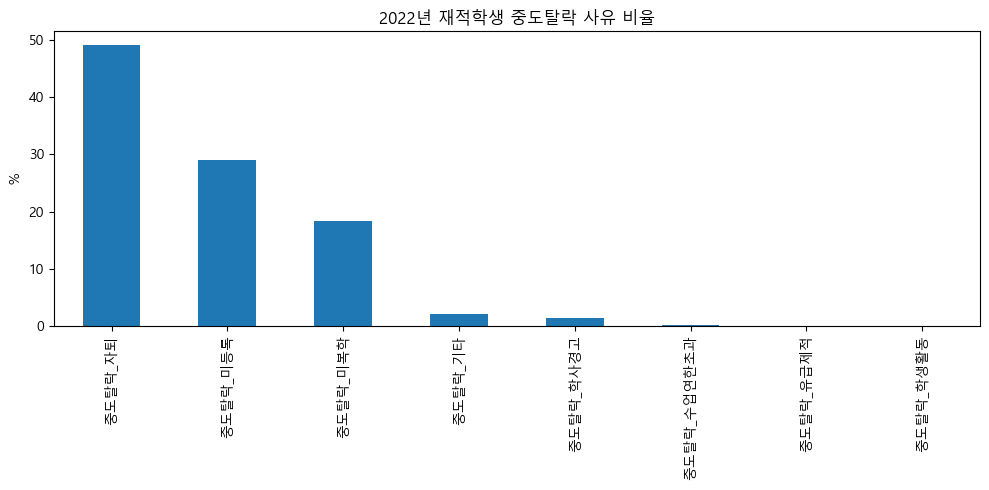

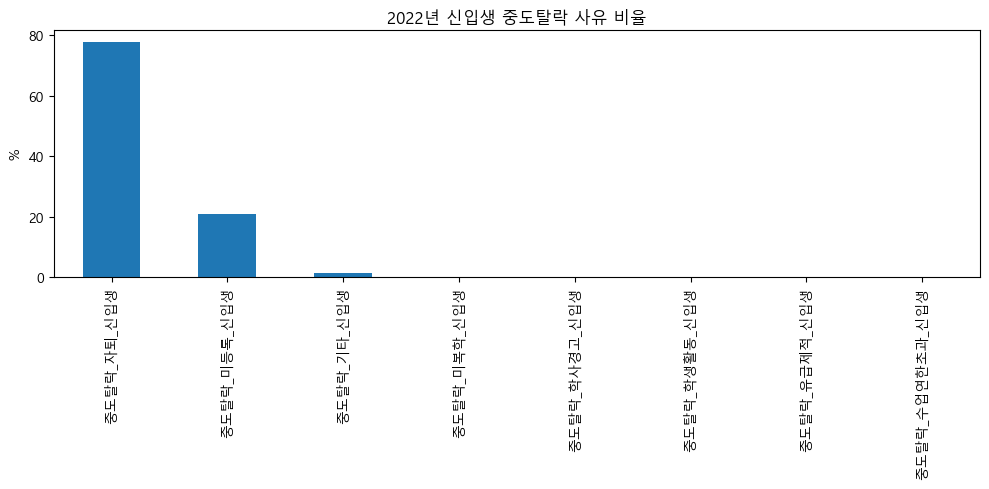

In [11]:
reason_cols = ['중도탈락_미등록', '중도탈락_미복학', '중도탈락_자퇴', '중도탈락_학사경고',
               '중도탈락_학생활동', '중도탈락_유급제적', '중도탈락_수업연한초과', '중도탈락_기타']
total = df['중도탈락_계'].sum()
ratios = df[reason_cols].sum() / total * 100

ratios.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title(f'{year}년 재적학생 중도탈락 사유 비율')
plt.ylabel('%')
plt.tight_layout()
plt.show()

new_cols = [col + '_신입생' for col in reason_cols]
new_total = df['중도탈락_계_신입생'].sum()
new_ratios = df[new_cols].sum() / new_total * 100

new_ratios.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title(f'{year}년 신입생 중도탈락 사유 비율')
plt.ylabel('%')
plt.tight_layout()
plt.show()


In [12]:
display(Markdown(r'''
### ✅ 분석 요약 및 인사이트
- 자퇴율 높은 대학은 학사경고, 자퇴 항목과 밀접한 상관관계를 가짐  
- 신입생은 미등록, 자퇴, 유급 등의 요인 비중이 높음  
- 학사 관리 및 상담 강화, 신입생 초기 지원 체계가 필요
'''))



### ✅ 분석 요약 및 인사이트
- 자퇴율 높은 대학은 학사경고, 자퇴 항목과 밀접한 상관관계를 가짐  
- 신입생은 미등록, 자퇴, 유급 등의 요인 비중이 높음  
- 학사 관리 및 상담 강화, 신입생 초기 지원 체계가 필요
